In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math

# sklearn package

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
#Importing dataset
df=pd.read_csv('TCS.csv')
df=df.drop(['Date'],axis=1)
df

,Open,High,Low,Close,Adj Close,Volume
0,377.399994,379.450012,374.524994,375.825012,295.672607,1963682.0
1,377.500000,379.774994,373.274994,375.924988,295.751312,2014488.0
2,375.924988,376.100006,366.500000,367.424988,289.064026,3349176.0
3,367.750000,369.700012,355.500000,357.200012,281.019836,6474892.0
4,358.000000,359.250000,348.250000,349.899994,275.276611,6048178.0
...,...,...,...,...,...,...
3188,3330.000000,3330.000000,3291.000000,3308.300049,3308.300049,1150011.0
3189,3316.250000,3392.949951,3308.300049,3380.149902,3380.149902,1296591.0
3190,3383.000000,3403.350098,3348.000000,3389.649902,3389.649902,1588981.0
3191,3366.000000,3417.000000,3365.550049,3395.250000,3395.250000,2195437.0


In [3]:
def rsi(close, periods = 14):
    
    close_delta = close.diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi
# Calculate money flow index

def gain(x):
    return ((x > 0) * x).sum()


def loss(x):
    return ((x < 0) * x).sum()

def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gain, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(loss, raw=True)
    return (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()

def atr(high, low, close, n=14):
    tr = np.amax(np.vstack(((high - low).to_numpy(), (abs(high - close)).to_numpy(), (abs(low - close)).to_numpy())).T, axis=1)
    return pd.Series(tr).rolling(n).mean().to_numpy()

In [4]:
df['EMA_9']=df['Close'].ewm(5).mean().shift()
df['SMA_50']=df['Close'].rolling(50).mean().shift()
df['SMA_100']=df['Close'].rolling(100).mean().shift()
df['SMA_200']=df['Close'].rolling(200).mean().shift()
df['RSI'] = rsi(df['Close'])
df['MFI'] = mfi(df['High'], df['Low'], df['Close'], df['Volume'], 14)
df['ATR'] = atr(df['High'], df['Low'], df['Close'], 14)
df=df.fillna(df.mean())
df

,Open,High,Low,Close,Adj Close,Volume,EMA_9,SMA_50,SMA_100,SMA_200,RSI,MFI,ATR
0,377.399994,379.450012,374.524994,375.825012,295.672607,1963682.0,1539.943647,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
1,377.500000,379.774994,373.274994,375.924988,295.751312,2014488.0,375.825012,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
2,375.924988,376.100006,366.500000,367.424988,289.064026,3349176.0,375.879544,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
3,367.750000,369.700012,355.500000,357.200012,281.019836,6474892.0,372.534885,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
4,358.000000,359.250000,348.250000,349.899994,275.276611,6048178.0,367.598473,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3330.000000,3330.000000,3291.000000,3308.300049,3308.300049,1150011.0,3296.216824,3149.771982,3191.442495,3362.701240,59.881632,48.589854,50.439296
3189,3316.250000,3392.949951,3308.300049,3380.149902,3380.149902,1296591.0,3298.230695,3151.584985,3191.343997,3360.239491,67.032277,55.064216,54.125000
3190,3383.000000,3403.350098,3348.000000,3389.649902,3389.649902,1588981.0,3311.883896,3154.328984,3192.240496,3357.859241,67.848274,62.244502,54.228568
3191,3366.000000,3417.000000,3365.550049,3395.250000,3395.250000,2195437.0,3324.844897,3157.534980,3193.465994,3355.684490,68.345656,63.652642,54.496425


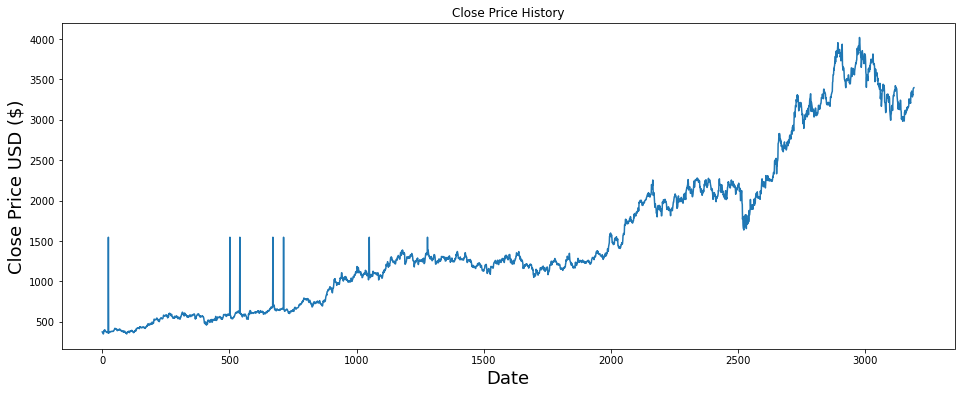

In [5]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3034

In [7]:
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,EMA_9,SMA_50,SMA_100,SMA_200,RSI,MFI,ATR
0,377.399994,379.450012,374.524994,375.825012,295.672607,1963682.0,1539.943647,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
1,377.500000,379.774994,373.274994,375.924988,295.751312,2014488.0,375.825012,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
2,375.924988,376.100006,366.500000,367.424988,289.064026,3349176.0,375.879544,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
3,367.750000,369.700012,355.500000,357.200012,281.019836,6474892.0,372.534885,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
4,358.000000,359.250000,348.250000,349.899994,275.276611,6048178.0,367.598473,1622.069739,1674.928079,1773.583798,53.122296,53.245749,33.718929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3330.000000,3330.000000,3291.000000,3308.300049,3308.300049,1150011.0,3296.216824,3149.771982,3191.442495,3362.701240,59.881632,48.589854,50.439296
3189,3316.250000,3392.949951,3308.300049,3380.149902,3380.149902,1296591.0,3298.230695,3151.584985,3191.343997,3360.239491,67.032277,55.064216,54.125000
3190,3383.000000,3403.350098,3348.000000,3389.649902,3389.649902,1588981.0,3311.883896,3154.328984,3192.240496,3357.859241,67.848274,62.244502,54.228568
3191,3366.000000,3417.000000,3365.550049,3395.250000,3395.250000,2195437.0,3324.844897,3157.534980,3193.465994,3355.684490,68.345656,63.652642,54.496425


In [8]:
# seperate out our x and y values
df1=df.drop(['Close'],axis=1)
y_values=df['Close']



In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(df1)
scaled_df


array([[0.00689852, 0.00609062, 0.00877006, ..., 0.50636946, 0.52506373,
        0.19435451],
       [0.00692568, 0.00617878, 0.0084264 , ..., 0.50636946, 0.52506373,
        0.19435451],
       [0.00649791, 0.00518177, 0.0065638 , ..., 0.50636946, 0.52506373,
        0.19435451],
       ...,
       [0.82320511, 0.82646503, 0.82624832, ..., 0.72642388, 0.62779037,
        0.34286746],
       [0.81858799, 0.8301682 , 0.83107325, ..., 0.73385639, 0.6438652 ,
        0.34480705],
       [0.82320511, 0.83342377, 0.83587065, ..., 0.73679329, 0.71083581,
        0.34369495]])

In [10]:
#Applying dimension reduction we find that without dm rmse is less
pca = PCA(n_components=5) # estimate only 2 PCs
x_values = pca.fit_transform(scaled_df) # project the original data into the PCA space   
x_values

array([[-0.45289525, -0.05564437,  0.27430644,  0.07602672,  0.15366316],
       [-0.57385616, -0.05850084,  0.34767857,  0.08631862,  0.20210627],
       [-0.57568169, -0.05875505,  0.34870441,  0.08708085,  0.20391584],
       ...,
       [ 1.39166809,  0.21716345,  0.07690589, -0.15717985, -0.03815544],
       [ 1.39564486,  0.2342045 ,  0.0770848 , -0.15180909, -0.0382169 ],
       [ 1.40217468,  0.28706268,  0.08431071, -0.11616659, -0.05825474]])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x_values,y_values, random_state=0)

In [12]:
x_train.shape

(2394, 5)

In [13]:
x_test.shape

(799, 5)

In [32]:
y_train

3119    3422.500000
2629    2248.100098
995     1083.500000
921      976.875000
2728    3158.949951
           ...     
763      664.275024
835      725.799988
1653    1242.025024
2607    2171.199951
2732    3260.699951
Name: Close, Length: 2394, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [15]:
regressor.fit(x_train,y_train) #passing parameters

LinearRegression()

In [16]:
predicted= regressor.predict(x_test)

In [17]:
print(x_test) #predicted value

[[-0.51931474  0.28412215 -0.17202575 -0.04036587  0.0664102 ]
 [-0.34918324  0.23669928 -0.06547574 -0.0235028  -0.00392695]
 [-0.85095416  0.14146486 -0.15320185 -0.01221138  0.02141943]
 ...
 [ 1.74189761 -0.30483023 -0.00304425 -0.10279904  0.06749341]
 [ 0.81827891  0.11141266 -0.09269219  0.04099828 -0.04946781]
 [-0.490959   -0.03246579 -0.2013982   0.01258394  0.06511238]]


In [18]:
predicted.shape

(799,)

In [19]:
dframe=pd.DataFrame(y_test,predicted)

In [20]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [21]:
print(dfr)

      Actual Price  Predicted Price
936    1044.875000      1038.743213
1733   1184.125000      1192.363821
461     561.474976       577.848307
480     588.799988       607.417165
298     538.525024       539.458133
...            ...              ...
1328   1249.625000      1242.178113
1049   1063.500000      1051.055277
2993   3743.449951      3768.304411
2695   2701.300049      2719.908088
951    1034.900024      1031.676875

[799 rows x 2 columns]


In [22]:
dfr.head(25)

,Actual Price,Predicted Price
936,1044.875000,1038.743213
1733,1184.125000,1192.363821
461,561.474976,577.848307
480,588.799988,607.417165
298,538.525024,539.458133
2351,2175.399902,2164.897065
1423,1296.849976,1291.533740
701,657.299988,675.684556
547,598.500000,608.502976
2842,3341.500000,3356.461566


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
regressor.score(x_test,y_test) #accuracy score of model

0.9994783040381422

In [25]:
import math

In [26]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,predicted))

Mean absolute error: 14.281804979865177


In [27]:
print('Root mean square error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root mean square error: 21.554489161040753


In [28]:
#MAPE
def MAPE(y_actual,y_predicted):
    mape=np.mean(np.abs((y_actual-y_predicted)/y_actual))*100
    return mape

LR_MAPE=MAPE(y_test,predicted)
print(LR_MAPE)

1.3524006445451728


In [29]:
#R2 score
from sklearn.metrics import r2_score
r2=r2_score(y_test,predicted)
print(r2)

0.9994783040381422
